![pic](https://github.com/zotroneneis/machine_learning_basics/raw/c21753daa38c6f321a97942a721751ff7cbedd91/figures/logistic_regression.jpg)

https://github.com/zotroneneis/machine_learning_basics/blob/master/logistic_regression.ipynb

1. 训练集
2. sigmoid 激活函数，分类器：0，1
3. 计算损失函数，交叉熵
4. 计算梯度，随机梯度下降
5. 更新权重值

In [81]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
np.random.seed(123)

% matplotlib inline

UsageError: Line magic function `%` not found.


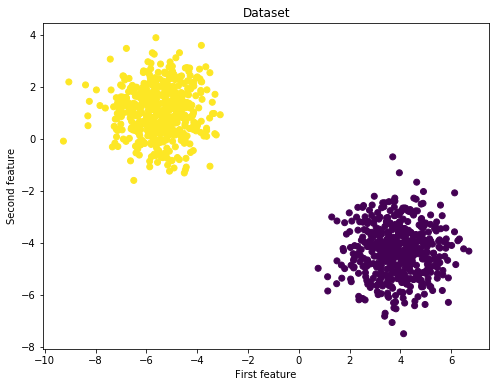

In [82]:
X, y_true = make_blobs(n_samples= 1000, centers=2)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y_true)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [83]:
y_true.shape

(1000,)

In [84]:
# Reshape targets to get column vector with shape (n_samples, 1)
y_true = y_true[:, np.newaxis]
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_true)
y_true.shape

(1000, 1)

In [88]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def train(x,y,batch,lr):
    
    # 1.initialize weigths
    xx, yy = x.shape
    w = np.zeros((yy,1))  # features in to shape
    b = 0
    losses = []
    
    # 2. compute linear combination of input and weight
    for i in range(batch):
        y_predict = sigmoid(np.dot(x, w)) + b  # activate
        
        # 3. compute the lost on the whole training set
        loss = (-1/xx) * np.sum(y*np.log(y_predict) + (1-y)*(np.log(1-y_predict)))
        
        # 4. compute the gradients
        dw = (1/xx) * np.dot(x.T, (y_predict-y))
        db = (1/xx) * np.sum(y_predict-y)
        
        # 5 update the weights
        w = w - dw * lr
        b = b - db * lr
        
        losses.append(loss)
        
        if i%100 == 0:
            print(f"Loss after iteration {i}: {loss}")
            
    return w,b,losses


In [95]:
w_trained, b_trained, costs = train(X_train, y_train, batch=800, lr=0.0009)
# 出现NAN时，说明已经发散了，需要调整学习率，是原来的1/10倍

Loss after iteration 0: 0.6931471805599453
Loss after iteration 100: 0.32492670407695984
Loss after iteration 200: 0.20065636942520362
Loss after iteration 300: 0.14322418429803577
Loss after iteration 400: 0.11091389495005798
Loss after iteration 500: 0.09038509508217869
Loss after iteration 600: 0.07624440121565279
Loss after iteration 700: 0.0659321966118791


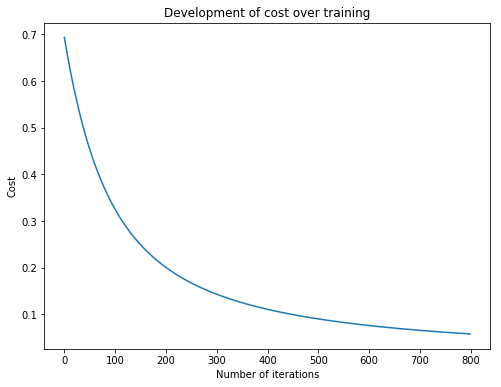

In [96]:
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(800), costs)
plt.title("Development of cost over training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [97]:
w_trained,b_trained

(array([[-0.47528191],
        [ 0.2677821 ]]), 0.003620711079116517)

In [78]:
def predict(X, weights, bias):
    """
    Predicts binary labels for a set of examples X.
    """
    y_predict = sigmoid(np.dot(X, weights) + bias)
    y_predict_labels = [1 if elem > 0.5 else 0 for elem in y_predict]

    return np.array(y_predict_labels)[:, np.newaxis]

y_p_train = predict(X_train,w_trained,b_trained)
y_p_test = predict(X_test,w_trained,b_trained)

print(f"train accuracy: {100 - np.mean(np.abs(y_p_train - y_train)) * 100}%")
print(f"test accuracy: {100 - np.mean(np.abs(y_p_test - y_test))}%")

train accuracy: 100.0%
test accuracy: 100.0%


# 逻辑回归


In [1]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import random

#defines the classification for the training data.
def true_classifier(i):
    if i >= 700:
        return 1
    return 0

#Generate a random dataset which includes random scores from 0 to 1000.
x = np.array([ random.randint(0,1000) for i in range(0,1000) ])

#The model will expect a 2D array, so we must reshape
#For the model, the 2D array must have rows equal to the number of samples,
#and columns equal to the number of features.
#For this example, we have 1000 samples and 1 feature.
x = x.reshape((-1, 1))

#For each point, y is a pass/fail for the grade. The simple threshold is arbitrary,
#and can be changed as you would like. Classes are 1 for success and 0 for failure
y = [ true_classifier(x[i][0]) for i in range(0,1000) ]


#Again, we need a numpy array, so we convert.
y = np.array(y)

#Our goal will be to train a logistic regression model to do pass/fail to the same threshold.
model = LogisticRegression(solver='liblinear')

#The fit method actually fits the model to our training data
model = model.fit(x,y)

#Create 100 random samples to try against our model as test data
samples = [random.randint(0,1000) for i in range(0,100)]
#Once again, we need a 2d Numpy array
samples = np.array(samples)
samples = samples.reshape(-1, 1)

#Now we use our model against the samples.  output is the probability, and _class is the class.
_class = model.predict(samples)
proba = model.predict_proba(samples)

num_accurate = 0

#Finally, output the results, formatted for nicer viewing.
#The format is [<sample value>]: Class <class number>, probability [ <probability for class 0> <probability for class 1>]
#So, the probability array is the probability of failure, followed by the probability of passing.
#In an example run, [7]: Class 0, probability [  9.99966694e-01   3.33062825e-05]
#Means that for value 7, the class is 0 (failure) and the probability of failure is 99.9%
for i in range(0,100):
    if (true_classifier(samples[i])) == (_class[i] == 1):
        num_accurate = num_accurate + 1
    print("" + str(samples[i]) + ": Class " + str(_class[i]) + ", probability " + str(proba[i]))
#skip a line to separate overall result from sample output
print("")
print(str(num_accurate) +" out of 100 correct.")

[736]: Class 1, probability [0.29973405 0.70026595]
[318]: Class 0, probability [0.99557848 0.00442152]
[601]: Class 0, probability [0.7640388 0.2359612]
[83]: Class 0, probability [9.99868879e-01 1.31121348e-04]
[84]: Class 0, probability [9.99866899e-01 1.33101266e-04]
[912]: Class 1, probability [0.02969506 0.97030494]
[858]: Class 1, probability [0.06433081 0.93566919]
[498]: Class 0, probability [0.93812801 0.06187199]
[512]: Class 0, probability [0.92476845 0.07523155]
[918]: Class 1, probability [0.02721053 0.97278947]
[338]: Class 0, probability [0.99404209 0.00595791]
[224]: Class 0, probability [0.99891578 0.00108422]
[133]: Class 0, probability [9.99722609e-01 2.77390762e-04]
[591]: Class 0, probability [0.78998603 0.21001397]
[306]: Class 0, probability [0.99630366 0.00369634]
[271]: Class 0, probability [0.99780926 0.00219074]
[869]: Class 1, probability [0.05509099 0.94490901]
[737]: Class 1, probability [0.29659743 0.70340257]
[66]: Class 0, probability [9.99898370e-01 1

# Numpy 实现

In [1]:

from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
np.random.seed(13)

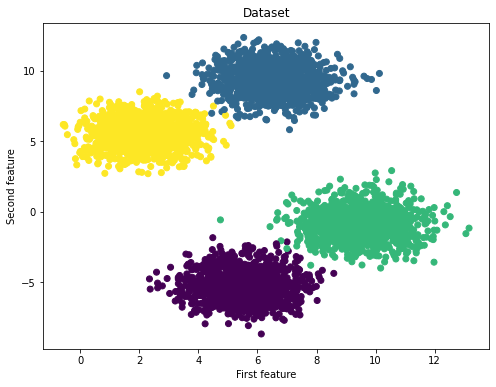

In [2]:
X, y_true = make_blobs(centers=4, n_samples = 5000)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y_true)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [3]:
# reshape targets to get column vector with shape (n_samples, 1)
y_true = y_true[:, np.newaxis]
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_true)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (3750, 2)
Shape y_train: (3750, 1)
Shape X_test: (1250, 2)
Shape y_test: (1250, 1)


# 逻辑回归模型

In [4]:
class SoftmaxRegressor:

    def __init__(self):
        pass

    def train(self, X, y_true, n_classes, n_iters=10, learning_rate=0.1):
        """
        Trains a multinomial logistic regression model on given set of training data
        """
        self.n_samples, n_features = X.shape
        self.n_classes = n_classes
        
        self.weights = np.random.rand(self.n_classes, n_features)
        self.bias = np.zeros((1, self.n_classes))
        all_losses = []
        
        for i in range(n_iters):
            scores = self.compute_scores(X)
            probs = self.softmax(scores)
            y_predict = np.argmax(probs, axis=1)[:, np.newaxis]
            y_one_hot = self.one_hot(y_true)

            loss = self.cross_entropy(y_one_hot, probs)
            all_losses.append(loss)

            dw = (1 / self.n_samples) * np.dot(X.T, (probs - y_one_hot))
            db = (1 / self.n_samples) * np.sum(probs - y_one_hot, axis=0)

            self.weights = self.weights - learning_rate * dw.T
            self.bias = self.bias - learning_rate * db

            if i % 100 == 0:
                print(f'Iteration number: {i}, loss: {np.round(loss, 4)}')

        return self.weights, self.bias, all_losses

    def predict(self, X):
        """
        Predict class labels for samples in X.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            numpy array of shape (n_samples, 1) with predicted classes
        """
        scores = self.compute_scores(X)
        probs = self.softmax(scores)
        return np.argmax(probs, axis=1)[:, np.newaxis]

    def softmax(self, scores):
        """
        Tranforms matrix of predicted scores to matrix of probabilities
        
        Args:
            scores: numpy array of shape (n_samples, n_classes)
            with unnormalized scores
        Returns:
            softmax: numpy array of shape (n_samples, n_classes)
            with probabilities
        """
        exp = np.exp(scores)
        sum_exp = np.sum(np.exp(scores), axis=1, keepdims=True)
        softmax = exp / sum_exp
        
        return softmax

    def compute_scores(self, X):
        """
        Computes class-scores for samples in X
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            scores: numpy array of shape (n_samples, n_classes)
        """
        return np.dot(X, self.weights.T) + self.bias

    def cross_entropy(self, y_true, probs):
        loss = - (1 / self.n_samples) * np.sum(y_true * np.log(probs))
        return loss

    def one_hot(self, y):
        """
        Tranforms vector y of labels to one-hot encoded matrix
        """
        one_hot = np.zeros((self.n_samples, self.n_classes))
        one_hot[np.arange(self.n_samples), y.T] = 1
        return one_hot

Iteration number: 0, loss: 2.5599
Iteration number: 100, loss: 0.2034
Iteration number: 200, loss: 0.1595
Iteration number: 300, loss: 0.1364
Iteration number: 400, loss: 0.1205
Iteration number: 500, loss: 0.1083
Iteration number: 600, loss: 0.0985
Iteration number: 700, loss: 0.0905


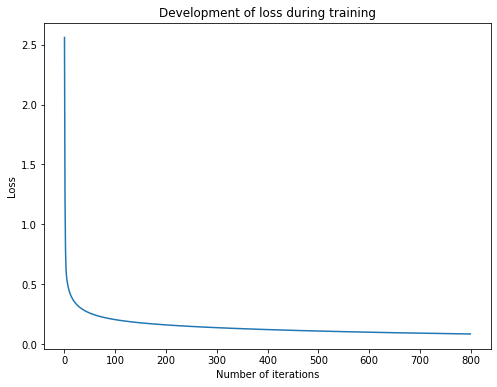

In [6]:

regressor = SoftmaxRegressor()
w_trained, b_trained, loss = regressor.train(X_train, y_train, learning_rate=0.1, n_iters=800, n_classes=4)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(800), loss)
plt.title("Development of loss during training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

In [7]:
n_test_samples, _ = X_test.shape
y_predict = regressor.predict(X_test)
print(f"Classification accuracy on test set: {(np.sum(y_predict == y_test)/n_test_samples) * 100}%")

Classification accuracy on test set: 99.03999999999999%
